<h1> <b> ANALISIS DE SENTIMIENTOS DE LOS COMENTARIOS PERTENCIENTES A LA EMPRESA FLIPKART <h1> <b>

In [ ]:
!pip list

In [ ]:
!pip install contractions
!pip install spacy==3.2.1
!python -m spacy download en_core_web_sm
import nltk
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully uninstalled wasabi-1.1.2
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.12
    Uninstalling pydantic-1.10.12:
      Successfully uninstalled pydantic-1.10.12
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.12
    Uninstalling thinc-8.1.12:
      Successfully uninst

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import en_core_web_sm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

**Funciones que voy a utilizar**

In [ ]:
# Reemplazar contracciones y slang en inglés usando la librería "contractions" https://github.com/kootenpv/contractions
def replace_contraction(text):
    expanded_words = []
    # Divide el texto
    for t in text.split():
        # Aplica la función fix en cada sección o token del texto buscando contracciones y slang
        expanded_words.append(contractions.fix(t, slang = True))
    expanded_text = ' '.join(expanded_words)
    return expanded_text

In [ ]:
# Tokenizar los tweets con el tokenizador "TweetTokenizer" de NLTK
def tokenize(texto):
  tweet_tokenizer = TweetTokenizer()
  tokens_list = tweet_tokenizer.tokenize(texto)
  return tokens_list

# Quitar stop words de una lista de tokens
def quitar_stopwords(tokens):
    stop_words = nltk.corpus.stopwords.words('english')
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence


# Eliminar signos de puntuación de una lista de tokens
# (nos quedamos sólo lo alfanumérico en este caso)
def quitar_puntuacion(tokens):
    words=[word for word in tokens if word.isalnum()]
    return words


# Lemmatization de los tokens. Devuelve una string entera para hacer la tokenización
# con NLTK
nlp = en_core_web_sm.load(disable=['parser', 'ner'])
def lematizar(tokens):
    sentence = " ".join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Extraemos el text en una string
    return " ".join(mytokens)


##***Adquisicion y Preparación de los Datos***

###***Adquisicion de los Datos***###

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import io

df = pd.read_csv('/content/drive/MyDrive/Dataset-SA 2.csv')

In [ ]:
df.head(40)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,highly recommended,very good product,positive
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,nice,very nice,positive
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,unsatisfactory,very bad cooler,negative
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,4,worth the money,very good,positive


vamos a comprobar el tamaño del dataset

In [ ]:
print("El dataset tiene {} filas y {} columnas".format(df.shape[0],df.shape[1]))

El dataset tiene 205052 filas y 6 columnas


###***Analisis exploratorio de los datos (EDA)***

**1. Exploramos el dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


**2. visualizamos si hay valores duplicados**

In [ ]:
print("Existen {} Summary duplicados ".format(np.sum(df.duplicated(subset=["product_name","product_price","Rate","Review","Summary","Sentiment"]))))

Existen 34375 Summary duplicados 


mostramos las filas duplicados

In [ ]:
duplicados = df[df.duplicated(subset=["product_name","product_price","Rate","Review","Summary","Sentiment"])]
print(duplicados)

                                             product_name product_price Rate  \
150     MAHARAJA WHITELINE 65 L Desert Air Cooler?????...          7999    4   
154     MAHARAJA WHITELINE 65 L Desert Air Cooler?????...          7999    5   
248     MAHARAJA WHITELINE 65 L Desert Air Cooler?????...          7999    5   
288     MAHARAJA WHITELINE 65 L Desert Air Cooler?????...          7999    4   
314     MAHARAJA WHITELINE 65 L Desert Air Cooler?????...          7999    5   
...                                                   ...           ...  ...   
205036  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
205041  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
205042  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
205047  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
205048  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   

                       Review          

Quitamos elementos duplicados

In [ ]:
df=df.drop_duplicates()

In [ ]:
print("Despues de quitar duplicados tenemos un conjunto de {} filas".format(df.shape[0]))

Despues de quitar duplicados tenemos un conjunto de 170677 filas


In [ ]:
print("Existen {} filas duplicadas".format(np.sum(df.duplicated(subset=["product_name","product_price","Rate","Review","Summary","Sentiment"]))))

Existen 0 filas duplicadas


**3. Visualizamos los valores nulos o faltantes**

In [ ]:
df.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           16202
Summary             10
Sentiment            0
dtype: int64

Eliminamos las filas con valores nulos

In [ ]:
df.dropna(inplace=True, axis=0)

In [ ]:
print("despues de quitar los valores nulos tenemos un conjunto de {} filas".format(df.shape[0]))

despues de quitar los valores nulos tenemos un conjunto de 154467 filas


**4. Extraccion de muestra estratificada**

Debido a la cantidad de ejemplos existentes en el dataset solo se tomara una muestra significativa para la variable multiclase.

In [ ]:
df["Sentiment"].value_counts()

positive    122808
negative     23353
neutral       8306
Name: Sentiment, dtype: int64

In [ ]:
n = 5513 # el tamaño de tu muestra
pesos = {"positive": 2625/n, "negative": 2068/n, "neutral": 821/n}
#pesos = {"positive": 250/n, "negative": 197/n, "neutral": 78/n}
df= df.groupby("Sentiment").apply(lambda x: x.sample(n=int(pesos[x.name]*n)))

In [ ]:
df["Sentiment"].value_counts()

positive    2625
negative    2068
neutral      821
Name: Sentiment, dtype: int64

**5. Exploramos las variables**

5.1.Exploramos la variable Rate

In [ ]:
df["Rate"].value_counts()

5    2067
1    1485
4     843
3     674
2     445
Name: Rate, dtype: int64

La columna Calificación de los productos contiene las calificaciones dadas por cada cliente. Podemos observar que la mayoria de ellos han calificado con 5 puntos los productos de Flipkart, ahora hechemos un vistazo con dos graficos el porcentaje de cada puntuacion hecho por los clientes.

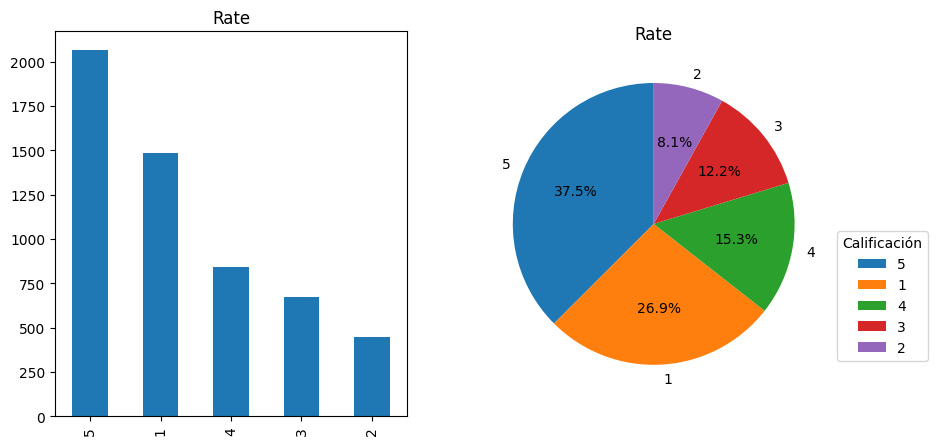

In [ ]:
ratings = df["Rate"].value_counts()
ranting = ratings.index
quantity = ratings.values

figure, (ax1,ax2)=plt.subplots(nrows=1, ncols=2,figsize=(10,5))
ratings.plot(ax=ax1,kind="bar",x=ranting, y=quantity, title="Rate")

ax2.pie( quantity,labels=ranting,autopct="%1.1f%%",startangle=90)
ax2.set_title("Rate")
ax2.legend(title="Calificación", loc="best",bbox_to_anchor=(1.0,0.5))

plt.show()


En el análisis de los datos, se observa que un 37.9% de los usuarios otorgan una calificación de 5 sobre 5 a los productos de Flipkart después de realizar su compra. Esto se ve seguido por el 26.6% de usuarios que otorgan la calificación más baja, es decir, 1 de 5. Sin embargo, es importante destacar que al sumar las calificaciones positivas de 5 y 4, estas representan un porcentaje del 54.1%, en contraste con el 34.5% que conforma la suma de las calificaciones 1 y 2. Este análisis resalta la preferencia y satisfacción de los usuarios hacia las calificaciones más altas, lo que indica una percepción general positiva de los productos ofrecidos por Flipkart por parte de la mayoría de los clientes.

5.2.Exploramos la variable Review


Utilizaremos la nube de palabras para visualizar las palabras más utilizadas en la columna de reseñas

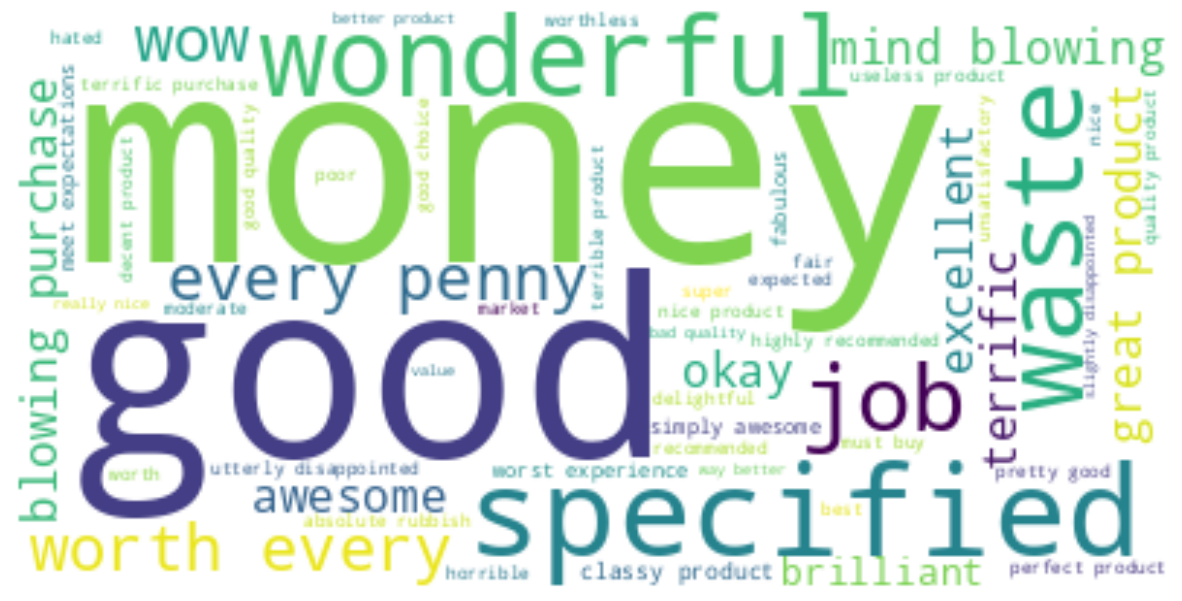

In [ ]:
text = " ".join(i for i in df.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Es evidente que las palabras más frecuentemente utilizadas en los comentarios están en estrecha relación con el porcentaje predominante obtenido en la variable "Rate", que corresponde a las calificaciones de 5 y 4 puntos. Entre las palabras más recurrentes se encuentran "wonderful", "specified", "nice", y "good". Estas palabras positivas reflejan la tendencia de los usuarios a expresar opiniones favorables en sus comentarios, lo que concuerda con el alto porcentaje de calificaciones positivas que se han otorgado a los productos o servicios evaluados.

5.3.Exploramos la variable Product_name

In [ ]:
df["product_name"].value_counts()

cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÃÂ ÃÂ (White, Microwave Safe)                                                                                110
Lakm?? Eyeconic Kajal Twin Pack??????????(Deep Black, 0.7 g)                                                                                                                                                90
Mi 5A 80 cm (32 inch) HD Ready LED Smart Android TV with Dolby Audio (2022 Model)                                                                                                                           82
NIVIA Storm Football - Size: 5ÐÓ®ÐÂ ÐÓ®ÐÂ (Pack of 1, Multicolor)                                                                                                                                       76
Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)                                                                                                                

Para poder visualizar mejor la variable ,solo filtraremos los 10 productos más comprados por los clientes.

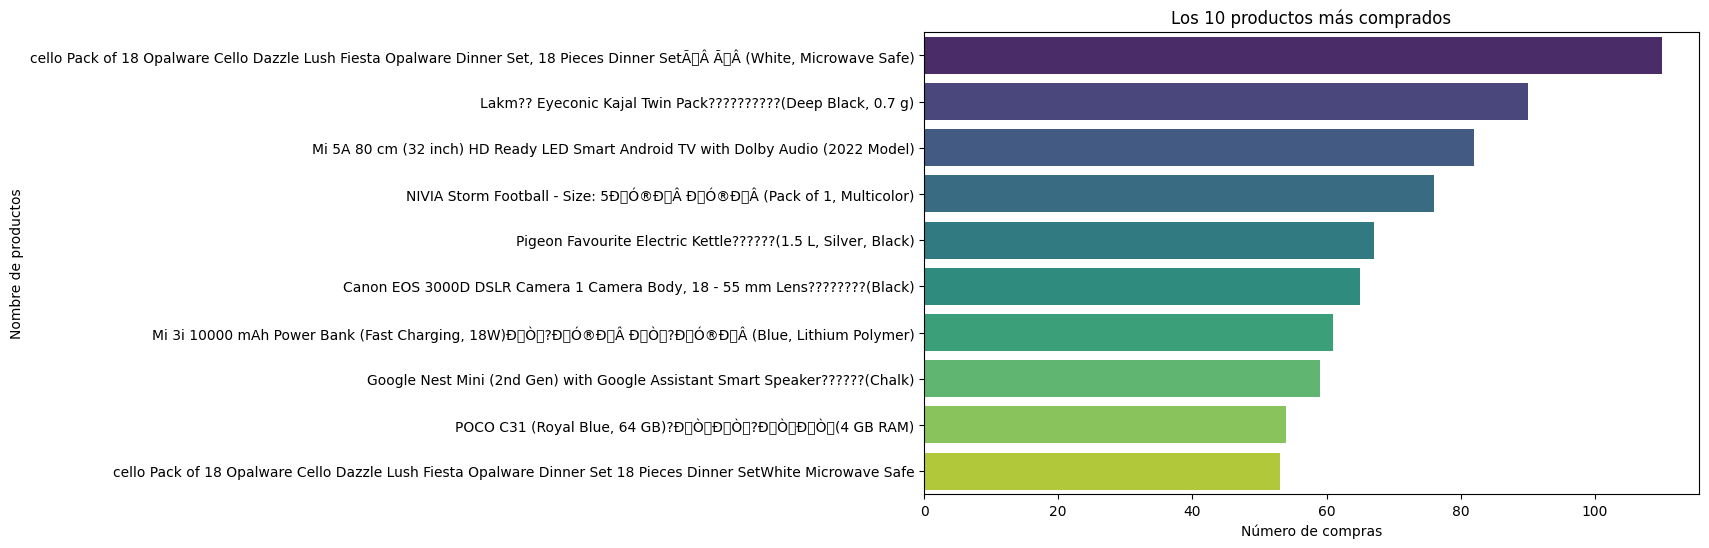

In [ ]:
import matplotlib.pyplot as plt
top_products = df['product_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Los 10 productos más comprados")
plt.ylabel("Nombre de productos")
plt.xlabel("Número de compras")
plt.show()


En el gráfico de barras, se puede constatar que uno de los productos más adquiridos es el "Cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner Set (White, Microwave Safe)", con un total de 4362 compradores. Esta cifra señala claramente la popularidad y la demanda significativa de este producto en particular entre los consumidores.

5.4.Exploramos la variable Product_price

In [ ]:
df ["product_price"].value_counts().sort_index()

10000     1
10790     5
10890    13
109      32
1095     32
         ..
989       9
997       3
999      22
9990      4
9999     48
Name: product_price, Length: 419, dtype: int64

Observamos los 10 primeros precios mas pagados

In [ ]:
df['product_price'].value_counts().nlargest(10)

1299     197
218      131
1599     127
13999    119
449      108
299      107
199       90
699       90
599       83
429       80
Name: product_price, dtype: int64

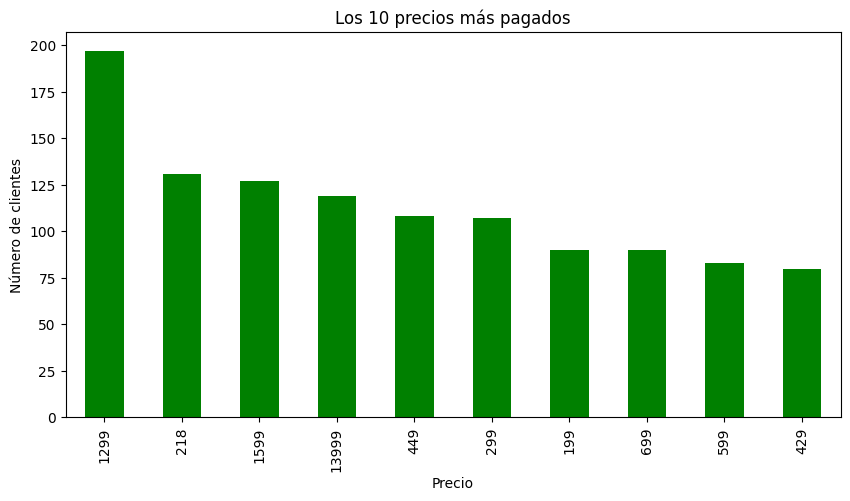

In [ ]:
import matplotlib.pyplot as plt

df['product_price'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,5), color="green")
plt.title("Los 10 precios más pagados")
plt.ylabel("Número de clientes")
plt.xlabel("Precio")
plt.show()

El gráfico de barras revela que el precio más frecuentemente abonado es de 1,299 dólares. Esto indica que la mayoría de las transacciones o compras se han realizado a este precio específico, lo que sugiere que este valor es el más predominante en las transacciones analizadas.

5.5.Exploramos la variable sentiment

In [ ]:
df["Sentiment"].value_counts()

positive    2625
negative    2068
neutral      821
Name: Sentiment, dtype: int64

**6. Comparamos cada una de las variables independientes con la variable target (Sentiment)**

6.1.Product price y Sentiment

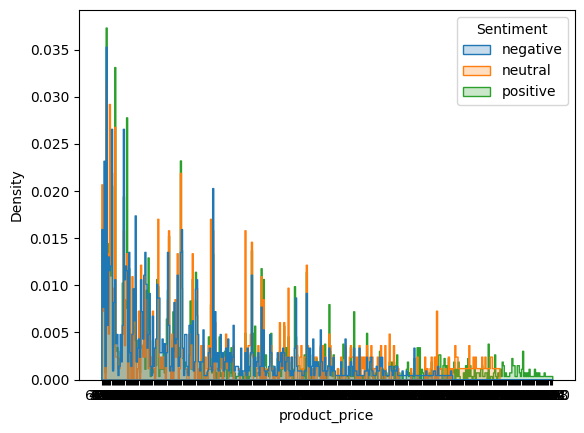

In [ ]:
sns.histplot(df, x= "product_price", hue="Sentiment", element='step', stat='density', common_norm=False)

plt.show()


In [ ]:
ten_first=df['product_price'].value_counts().head(10)
ten_first

1299     197
218      131
1599     127
13999    119
449      108
299      107
199       90
699       90
599       83
429       80
Name: product_price, dtype: int64

Ahora analizaremos la correlacion entre Product_price y Sentiment

In [ ]:
import numpy as np
from scipy.stats import spearmanr
# Calcular la correlación de Spearman entre las dos variables
correlation, pvalue = spearmanr(df["Sentiment"], df["product_price"])

# Mostrar el resultado
print("La correlación de Spearman es:", correlation)
print("El valor p es:", pvalue)

La correlación de Spearman es: 0.010276069275390291
El valor p es: 0.44551697936722456


La correlación de Spearman calculada es igual a 0.010. Este valor indica que existe una relación extremadamente débil entre las variables en cuestión, revelando una tenue tendencia en la que textos con un sentimiento más positivo pueden, en ciertos casos, estar asociados con productos de mayor precio, y viceversa. Además, el valor de p obtenido es 0.445, lo que demuestra que la correlación no alcanza significancia estadística al nivel convencional de 0.05. En resumen, no se dispone de evidencia suficiente para afirmar que las dos variables mantienen una relación monótona significativa

6.2. Rate y Sentiment

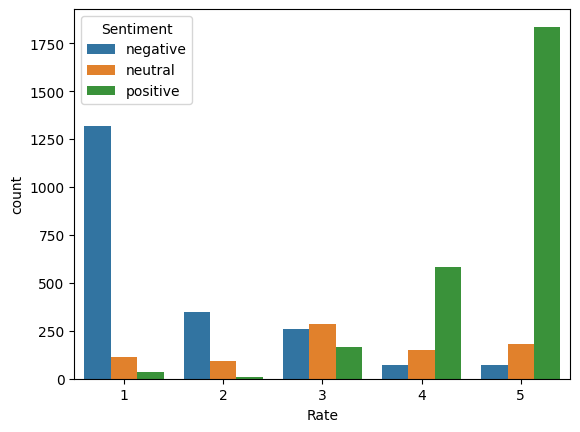

In [ ]:
sns.countplot(data=df, x='Rate', hue="Sentiment")
plt.show()

La observación de la gráfica revela patrones notables en la relación entre los ratios de calificación (5 y 4) y los sentimientos expresados por los clientes con respecto al producto adquirido. En concreto, se puede apreciar que para los ratios de 5 y 4, más del 90% de los clientes que otorgaron estas calificaciones muestran un sentimiento positivo hacia el producto.

En el caso del ratio 3, se destaca una predominancia leve del sentimiento neutral. En contraste, para los ratios de 1 y 2, se observa un predominio del sentimiento negativo, con una proporción significativamente menor de opiniones neutras y positivas en comparación.



A continuacion, procedemos a calcular la correlacion entre las variables Rate y Sentiment

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia con las frecuencias observadas de cada combinación de categorías
table = pd.crosstab(df["Sentiment"], df["product_price"])

# Calcular la prueba chi-cuadrado y obtener el valor chi-cuadrado, el valor p, los grados de libertad y las frecuencias esperadas
chi2, pvalue, dof, expected = chi2_contingency(table)

In [ ]:
# Calcular el coeficiente de contingencia usando el valor chi-cuadrado y el tamaño de la muestra
n = table.sum().sum()
contingency = np.sqrt(chi2 / (chi2 + n))

# Calcular el coeficiente phi usando el valor chi-cuadrado y el tamaño de la muestra
phi = np.sqrt(chi2 / n)

# Mostrar los resultados
print("El valor chi-cuadrado es:", chi2)
print("El valor p es:", pvalue)
print("El coeficiente de contingencia es:", contingency)
print("El coeficiente phi es:", phi)

El valor chi-cuadrado es: 1298.8871378783801
El valor p es: 1.0418241085625234e-22
El coeficiente de contingencia es: 0.4366365741697262
El coeficiente phi es: 0.4853469750921676


De acuerdo con los resultados obtenidos, la prueba de chi-cuadrado arroja un valor significativamente elevado de 1298.88, mientras que el valor p asociado es notablemente bajo. Esta discrepancia entre el valor chi-cuadrado y el valor p puede atribuirse a la sensibilidad del primero al tamaño de la muestra y a la distribución de los datos. En virtud de esta consideración, se otorga mayor confianza al valor p, lo que lleva a la conclusión de que las dos variables son independientes entre sí.

El coeficiente de contingencia y el coeficiente phi, como medidas de asociación, proporcionan información sobre el grado de relación entre las dos variables en cuestión. En este contexto, el coeficiente de contingencia se calcula en 0.437 y el coeficiente phi en 0.485, lo que denota una relación moderada y positiva entre ambas variables. Esta constatación indica una tendencia moderada a que los textos con un sentimiento más positivo se relacionen con valoraciones más altas, y viceversa.

En resumen, si bien la variable 'Rate' puede brindar información valiosa para el análisis de sentimientos, se debe tener en cuenta la posibilidad de inconsistencias o contradicciones con la variable 'Sentiment'. Algunos usuarios podrían otorgar valoraciones elevadas para expresar sentimientos negativos en el texto, o viceversa. Por lo tanto, la inclusión de la variable 'Rate' en el modelo de análisis de sentimientos puede introducir ruido o ambigüedad en los resultados.

6.3. Review y Sentiment

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

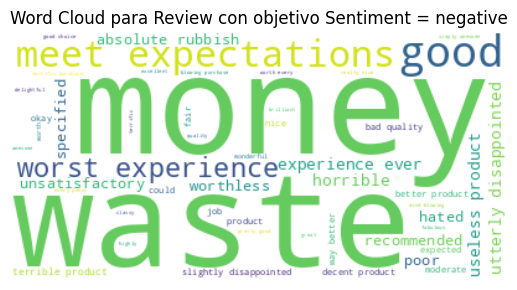

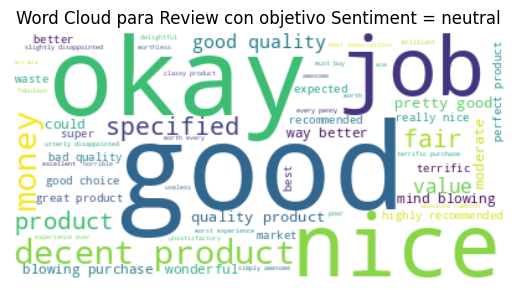

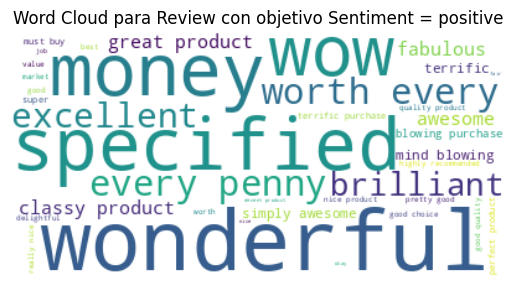

In [ ]:
for category in df["Sentiment"].unique():
  text = ' '.join(df[df["Sentiment"] == category]["Review"].astype(str))
  wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f"Word Cloud para {'Review'} con objetivo {'Sentiment'} = {category}") # Adding title
  plt.axis("off")
  plt.show()


En la nube de palabras se puede observar que las palabras más relevantes para el sentimiento negativo fueron: Money waste, worst experience, meet expectations y Good; para el sentimiento neutro se usaron con más frecuencia las palabras: okay, job, good, decent product y nice y para el sentimiento positivo se encontró: money specified, wonderful, wow, excellent, every penny y  worth every.  Como se observa en el WordCloud, algunas palabras no coinciden con la categoría asignada al comentario,por lo que se opta por descartar la variable review para el análisis de sentimiento, debido a que no representa fielmente la opinión de los cliente, lo que puede generar ruido o confusión en el estudio.

5.4. Summary y Sentiment

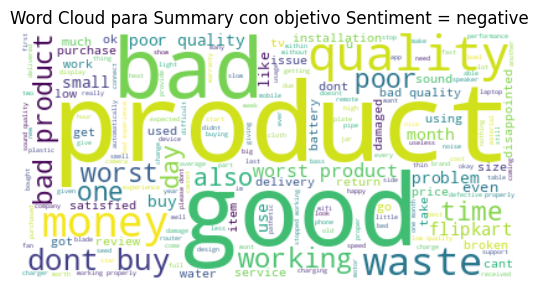

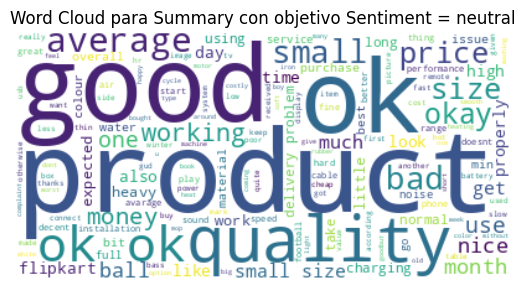

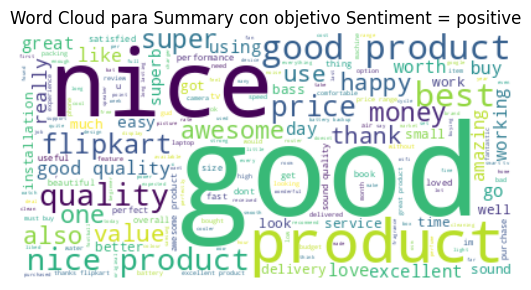

In [ ]:
for category in df["Sentiment"].unique():
  text = ' '.join(df[df["Sentiment"] == category]["Summary"].astype(str))
  wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f"Word Cloud para {'Summary'} con objetivo {'Sentiment'} = {category}") # Adding title
  plt.axis("off")
  plt.show()


En la representación de la nube de palabras, se observa que las palabras más frecuentes asociadas al sentimiento negativo incluyen términos como 'quality poor', 'bad producto', 'buy Good', 'working waste', 'money', y 'don’t buy'. Por otro lado, en el caso del sentimiento neutral, las palabras destacadas son 'average', 'Good', 'ok producto', 'ok quality', y en cuanto al sentimiento positivo, las palabras predominantes son 'nice', 'Good', 'nice producto', 'Good producto', 'quality', y 'happy'. Estos hallazgos respaldan la consideración de que la variable 'summary' es la más adecuada para medir el sentimiento de los clientes.

# ***Normalizacion y Vectorización***



## ***Procesamiento de Lenguaje Natural***
Vamos a proceder a normalizar los datos en las variable "Summary", luego utilizaremos las funciones anteriormente definidas para preprocesar los textos:

- Para Preprocesar los textos necesitamos:
    - Primero expander las contracciones de los comentarios de los clientes.
    - Tokenizar
    - Quitar stop words
    - Quitar signos de puntuación
    - Lematizar

### ***Preprocesar textos***


Empezamos expandiendo las contracciones.

In [ ]:
# Reemplazar contracciones en la variable text
import contractions

df["Summary_processed"] = df["Summary"].apply(lambda x:replace_contraction(x))

Despues tokenizamos el texto, y trabajaremos en limpiar los tokens que no son útiles en este problema para reducir dimensionalidad

In [ ]:
# Summary_processed
df["tokenized"] = df["Summary_processed"].apply(lambda x:tokenize(x))

Procesamos los tokens:

In [ ]:
# Quitar stopwords (quitar_stopwords)
df["tokenized_clean"] = df["tokenized"].apply(lambda x: quitar_stopwords(x))
# Quitamos los símbolos de puntuación (quitar_puntuacion)
df["tokenized_clean"] = df["tokenized_clean"].apply(lambda x: quitar_puntuacion(x))
# Lematizamos (lematizar)
df["lematizacion"] = df["tokenized_clean"].apply(lambda x: lematizar(x))

### ***Caracteristicas Adicionales al sentimiento***
Añadimos caracteristicas adicionales de sentimiento utilizando la libreria Textblob, esta funcion permite obtener dos medidas para una oracion o un texto dado: la polaridad y la subjetividad.

In [ ]:
!pip install -U textblob

In [ ]:
from textblob import TextBlob

In [ ]:
df["newsentiment"]=df["lematizacion"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
df.head()

product_name  \
Sentiment                                                             
negative  74812   NIVIA Storm Football - Size: 5ÐÓ®ÐÂ ÐÓ®ÐÂ ...   
          24526   Google Nest Hub (2nd gen), Display with Google...   
          17935   Pigeon Favourite Electric Kettle??????(1.5 L, ...   
          178768  SUMITRA ENTERPRISES Soft Plush Cushion Baby So...   
          202372  cello Pack of 18 Opalware Cello Dazzle Lush Fi...   

                 product_price Rate                     Review  \
Sentiment                                                        
negative  74812            429    1  did not meet expectations   
          24526           6999    2                bad quality   
          17935            699    1                   horrible   
          178768           495    3                       fair   
          202372          1299    2  expected a better product   

                                                            Summary Sentiment  \
Sentiment                                                                       
negative  74812                                         bad quality  negative   
          24526   i dont recommend anyone to buy this product be...  negative   
          17935   dont buy it this product worked for 3 months a...  negative   
          178768  low quality the baby isnt able to sit inside i...  negative   
          202372                         small in size not worth it  negative   

                                                  Summary_processed  \
Sentiment                                                             
negative  74812                                         bad quality   
          24526   i do not recommend anyone to buy this product ...   
          17935   do not buy it this product worked for 3 months...   
          178768  low quality the baby is not able to sit inside...   
          202372                         small in size not worth it   

                                                          tokenized  \
Sentiment                                                             
negative  74812                                      [bad, quality]   
          24526   [i, do, not, recommend, anyone, to, buy, this,...   
          17935   [do, not, buy, it, this, product, worked, for,...   
          178768  [low, quality, the, baby, is, not, able, to, s...   
          202372                  [small, in, size, not, worth, it]   

                                                    tokenized_clean  \
Sentiment                                                             
negative  74812                                      [bad, quality]   
          24526           [recommend, anyone, buy, product, worthy]   
          17935   [buy, product, worked, 3, months, stopped, wor...   
          178768  [low, quality, baby, able, sit, inside, mickey...   
          202372                               [small, size, worth]   

                                                       lematizacion  \
Sentiment                                                             
negative  74812                                         bad quality   
          24526                 recommend anyone buy product worthy   
          17935                  buy product work 3 month stop work   
          178768  low quality baby able sit inside mickey outsid...   
          202372                                   small size worth   

                  newsentiment  
Sentiment                       
negative  74812      -0.700000  
          24526       0.333333  
          17935       0.000000  
          178768     -0.034524  
          202372      0.025000

## ***Vectorización***

Una vez hemos limpiado y procesado el texto, vamos a extraer características utilizando TFIDFVectorizer:

**1** .Crearemos un objeto TfidfVectorizer con unigramas y bigramas,en el cual el sistema no considere los elementos que salgan en menos del 5% de los documentos.

In [ ]:
# Crear un objeto TfidfVectorizer con unigramas, bigramas y trigramas
vectorizador = TfidfVectorizer(min_df=0.005,ngram_range=(1,2))

In [ ]:
print("Unigramas:",len(vectorizador.vocabulary_))

print("Bigramas:",len([v for v in vectorizador.vocabulary_.keys() if len(v.split())==2]))

Unigramas: 208
Bigramas: 28


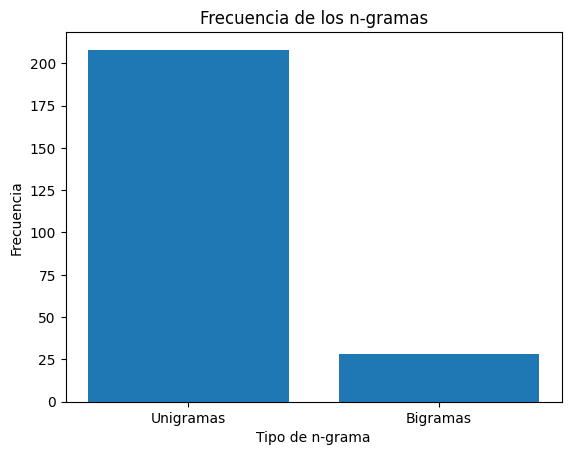

In [ ]:
# Crear una lista de las frecuencias de cada tipo de n-grama
frecuencias = [len(vectorizador.vocabulary_), len([v for v in vectorizador.vocabulary_.keys() if len(v.split())==2])]

# Crear el histograma
plt.bar(['Unigramas', 'Bigramas'], frecuencias)

# Agregar etiquetas al gráfico
plt.xlabel('Tipo de n-grama')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los n-gramas')

# Mostrar el gráfico
plt.show()

In [ ]:
# Obtenermos una lista de palabras que pertenecen a unigramas, bigramas y trigramas
feature_names = vectorizador.get_feature_names_out()
unigramas = [f for f in feature_names if len(f.split()) == 1]
bigramas = [f for f in feature_names if len(f.split()) == 2]

In [ ]:
print(bigramas)

['also good', 'awesome product', 'bad product', 'bad quality', 'battery backup', 'buy product', 'can not', 'good one', 'good price', 'good product', 'good quality', 'low quality', 'must buy', 'nice product', 'poor quality', 'product good', 'product quality', 'quality good', 'quality product', 'really good', 'small size', 'sound quality', 'stop work', 'thank flipkart', 'value money', 'waste money', 'work properly', 'worth money']


**2** .Convertimos el texto en una matriz de caracteristicas numericas

In [ ]:
vector_data = vectorizador.fit_transform(df["lematizacion"])

In [ ]:
vector_data
#convertir una matriz dispersa a una matriz densa
data_array=vector_data.toarray()
print(data_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
vector_data

<5514x208 sparse matrix of type '<class 'numpy.float64'>'
	with 19416 stored elements in Compressed Sparse Row format>

In [ ]:
# obtenemos los 10 términos más importantes en el conjunto de datos utilizando el vectorizador TfidfVectorizer.
feature_array = np.array(vectorizador.get_feature_names_out())
tfidf_sorting = np.argsort(data_array).flatten()[::-1]
top_n = feature_array[tfidf_sorting][:10]
print(top_n)

['nice product' 'nice' 'product' 'year' 'get' 'great' 'good quality'
 'good product' 'good price' 'good one']


# ***Entrenamiento y Clasificación***

En esta ocasión, además de utilizar las características de *Bag of Ngramas* generadas con TfidfVectorizer, nos interesa utilizar otro conjunto de características que podrían ser de interés para mejorar el rendimiento del clasificador.

En este caso, vamos a introducir las palabras que expresan sentimiento encontradas en los comentarios, asi como las caractisticas adicionales al sentimiento.

La forma más sencilla de hacer esto es utilizar la librería *scipy* y generar una matriz sparse, comprensible por scikit-learn, que contenga tanto las características de TFIDF como las calculadas manualmente.

En primer lugar, debemos seleccionar el conjunto de variables que queremos considerar en el entrenamiento. Para ello hacemos uso del selector `dataframe[["nombre_columna1", "nombre_columna2"]]`:

In [ ]:
extra_features = df[["newsentiment"]]

Utilizamos la librería scipy (función sparse.hstack) para unir las características TFIDF (contenidas en ´vector_data´) con las que acabamos de seleccionar (´extra_features´). Esta unión nos generará una matriz X que utilizaremos para hacer el train-test split posteriormente:

In [ ]:
import scipy as sp
# Extraemos las etiquetas y las asignamos a la variable y
encoder = LabelEncoder()
y = encoder.fit_transform(df['Sentiment'])

# Convertir la matriz densa a float64
X = sp.sparse.hstack((vector_data ,extra_features.values),format='csr')

In [ ]:
vector_data.shape[0]

5514


También vamos a extraer el nombre de las caracteríticas por si quisieramos utilizarlos con posterioridad.


In [ ]:
X_columns=list(vectorizador.get_feature_names_out())+extra_features.columns.tolist()

## ***Muestreo***
Vamos a dividir nuestros datos en Train y Test.

In [ ]:
# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=423)

# Mostrar las dimensiones
print(X_train.shape)
print(X_test.shape)

(4411, 190)
(1103, 190)


Creamos objeto SMOTE para gestionar el desbalanceo

In [ ]:
sm = SMOTE(random_state=423)

In [ ]:
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
y_train = pd.Series(y_train)
y_res = pd.Series(y_res)

In [ ]:
# Mostrar los resultados
print("Número de ejemplos antes del balanceo:", X_train.shape[0])
print("Número de ejemplos después del balanceo:", X_res.shape[0])
print("Distribución de las clases antes del balanceo:", y_train.value_counts())
print("Distribución de las clases después del balanceo:", y_res.value_counts())

Número de ejemplos antes del balanceo: 4411
Número de ejemplos después del balanceo: 6288
Distribución de las clases antes del balanceo: 2    2096
0    1643
1     672
dtype: int64
Distribución de las clases después del balanceo: 2    2096
1    2096
0    2096
dtype: int64


## ***Decision de modelo de ML a utilizar***



En primer lugar se ha generado una función para medir la calidad de varios modelos estándar de forma fácil y ver sus resultados.

La función hace un KFold y evalua diferentes modelos usando la métrica de evaluación accuracy:

In [ ]:
# Definimos las funcionalidades pertinentes de sklearn:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
# Definimos la función encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #PAra cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore')
          # Generamos un Kfold
          KF = KFold(n_splits = 10, shuffle = True, random_state = 423)

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False, n_jobs=-1)#para que haga en paralelo varias tareas

          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)

          # Mostramos los resultados numéricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

Una vez elaborada la función, podemos definir los modelos con los que hacer la evaluación. En este caso para predecir la variable multiclase podemos tomar en cuenta los siguientes algoritmos de aprendizaje supervisado : Clasificador de arbol de decision, regresión logística  multiclase, naive bayes, RandomForest y clasificador de vectores de sorporte.

In [ ]:
# Cargamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
         ("DecisionTreeClassifier",DecisionTreeClassifier()),
         ("LogisticRegresionMulticlass",LogisticRegression(multi_class="multinomial",solver="newton-cg")),
         ("GaussianNB",GaussianNB()),
         ("RandomForest",RandomForestClassifier()),
         ("SVM",SVC(random_state=30))
]

evaluation_score = "accuracy"

model_evaluation(models,  evaluation_score, X.toarray(), y)

Metric: accuracy , KFold 
DecisionTreeClassifier: 0.754628 (0.008498) 
Metric: accuracy , KFold 
LogisticRegresionMulticlass: 0.786729 (0.011527) 
Metric: accuracy , KFold 
GaussianNB: 0.529557 (0.028873) 
Metric: accuracy , KFold 
RandomForest: 0.790539 (0.014908) 
Metric: accuracy , KFold 
SVM: 0.796887 (0.012381) 


([array([0.75905797, 0.75      , 0.74637681, 0.74637681, 0.75862069,
         0.77313975, 0.74591652, 0.7477314 , 0.76225045, 0.75680581]),
  array([0.76630435, 0.77898551, 0.77536232, 0.80072464, 0.79854809,
         0.78584392, 0.7876588 , 0.79128857, 0.77858439, 0.80399274]),
  array([0.51268116, 0.53804348, 0.5923913 , 0.49637681, 0.54083485,
         0.53901996, 0.49909256, 0.55898367, 0.5154265 , 0.50272232]),
  array([0.77173913, 0.77717391, 0.7826087 , 0.80072464, 0.8076225 ,
         0.81306715, 0.78584392, 0.77313975, 0.80943739, 0.78402904]),
  array([0.77898551, 0.78623188, 0.78804348, 0.79891304, 0.8185118 ,
         0.8076225 , 0.78947368, 0.78584392, 0.81125227, 0.80399274])],
 ['DecisionTreeClassifier',
  'LogisticRegresionMulticlass',
  'GaussianNB',
  'RandomForest',
  'SVM'])

De los 5 algoritmos de aprendizaje supervisado nos quedaremos con los 3 que han obtenido un mejor accuracy , los cuales son: RandomForestClassifier, SVM y Logistic Regression Multiclass para los cuales usaremos grid_search para encontrar los mejores parametros, entrenarlos y asi obtener el mejor modelo.

## ***Grid Search***

**RandonForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#Definir el modelo de Random Forest
rf= RandomForestClassifier()

#definimos el espacio de busqueda
param_grid = {
    "n_estimators":[10,50,100],
    "max_depth":[None,5,10],
    "min_samples_split": [1,5,10],
    "min_samples_leaf":[1,2,3]
}

#definir el tipo de validacion cruzada y el criterio de evaluacion

cv= 5
scoring ="accuracy"

grid_search = GridSearchCV(rf, param_grid, cv=cv,scoring=scoring)




vamos a entrenar el grid_search para obtener el mejor parametro para nuestro conjunto de datos

In [ ]:
grid_result = grid_search.fit(X_res, y_res)



In [ ]:
#mostrar los resultados
print("Mejor modelo:", grid_result.best_estimator_)
print("Mejor puntuacion:", grid_result.best_score_)
print("Mejores hiperparametros:", grid_result.best_params_)

Mejor modelo: RandomForestClassifier(min_samples_split=5)
Mejor puntuacion: 0.8209349740025017
Mejores hiperparametros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


***Entrenamiento Random Forest Classifier***

Entrenamos el modelo con los resultados ofrecidos por la grid_search:

In [ ]:
model=RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_split=5,min_samples_leaf=1)
model.fit(X_res,y_res)

RandomForestClassifier(min_samples_split=5)

***Clasificacion Random Forest Classifier***

In [ ]:
# Evaluamos el modelo del conjunto de prueba
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

              precision    recall  f1-score   support

    negative       0.81      0.74      0.77       425
     neutral       0.51      0.52      0.52       149
    positive       0.82      0.87      0.84       529

    accuracy                           0.77      1103
   macro avg       0.71      0.71      0.71      1103
weighted avg       0.77      0.77      0.77      1103



['confusion_matrix']


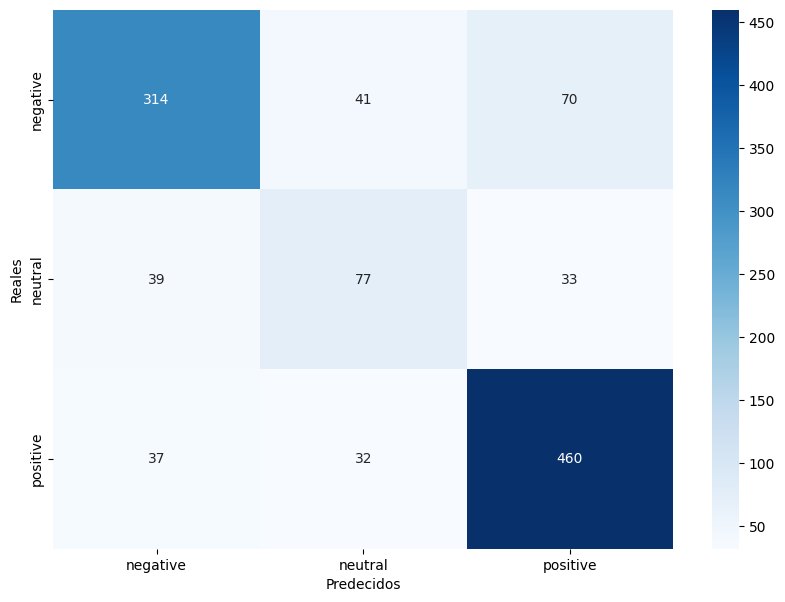

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(['confusion_matrix'])

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predecidos')
plt.ylabel('Reales')

plt.show()

**SVM: Suport Vector Machine**

In [ ]:
# Definir el diccionario de parámetros a probar
parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Crear el modelo SVM
model = SVC()

In [ ]:
# Crear el objeto GridSearchCV con scoring f1_score y promedio micro
grid_svm = GridSearchCV(estimator=model, param_grid=parameters, scoring='f1_micro', cv=5)

# Ajustar el modelo con los datos de entrenamiento
grid_svm.fit(X_res, y_res)

# Mostrar los mejores parámetros y la mejor puntuación
print("Mejor modelo:", grid_svm.best_estimator_)
print("Mejor puntuacion:", grid_svm.best_score_)
print("Mejores hiperparametros:", grid_svm.best_params_)


Mejor modelo: SVC(C=10, gamma=1)
Mejor puntuacion: 0.8330180243419048
Mejores hiperparametros: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


***Entrenamiento SVC***
Entrenamos el modelo con los resultados ofrecidos por la grid_search:

In [ ]:
# Crear el modelo SVM con los mejores parámetros
model_svm=SVC(C=10,gamma=1,kernel="rbf")

# Ajustar el modelo con los datos de entrenamiento
model_svm.fit(X_res,y_res)

SVC(C=10, gamma=1)

***Clasificacion SVC***

In [ ]:
# Evaluate the ensemble model- Evaluar el modelo de conjunto
y_pred_svm = model_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print(classification_report(y_test, y_pred_svm, target_names=encoder.classes_))

              precision    recall  f1-score   support

    negative       0.78      0.72      0.75       425
     neutral       0.48      0.53      0.51       149
    positive       0.82      0.85      0.84       529

    accuracy                           0.76      1103
   macro avg       0.69      0.70      0.70      1103
weighted avg       0.76      0.76      0.76      1103



['confusion_matrix']


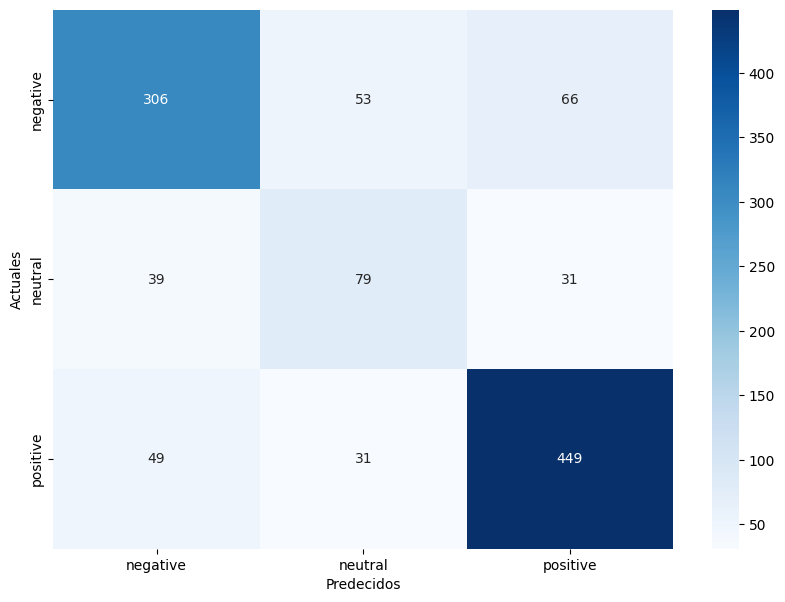

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
print(['confusion_matrix'])

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predecidos')
plt.ylabel('Actuales')

plt.show()

**Logistic Regression Multiclass**

In [ ]:
# Definir el diccionario de parámetros a probar
parameters_log = {'C': np.logspace(-4, 4, 50), 'penalty': ['l1', 'l2'], 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}

# Crear el modelo LogisticRegression con multi_class='multinomial'
model_log = LogisticRegression(multi_class='multinomial')

# Crear el objeto GridSearchCV con scoring f1_score y promedio micro
grid_log = GridSearchCV(estimator=model_log, param_grid=parameters_log, scoring='f1_micro', cv=5)

# Ajustar el modelo con los datos de entrenamiento
grid_log.fit(X_res, y_res)

# Mostrar los mejores parámetros y la mejor puntuación
print("Mejor modelo:", grid_log.best_estimator_)
print("Mejor puntuacion:", grid_log.best_score_)
print("Mejores hiperparametros:", grid_log.best_params_)

Mejor modelo: LogisticRegression(C=1.7575106248547894, multi_class='multinomial',
                   penalty='l1', solver='saga')
Mejor puntuacion: 0.786899689244207
Mejores hiperparametros: {'C': 1.7575106248547894, 'penalty': 'l1', 'solver': 'saga'}


***Entrenamiento Logistic Regression Multiclass***

In [ ]:
# Crear el modelo logistic con los mejores parámetros
model_logistc=LogisticRegression(multi_class="multinomial", C=1.7575106248547894, penalty="l1",solver="saga")

# Ajustar el modelo con los datos de entrenamiento
model_logistc.fit(X_res,y_res)

LogisticRegression(C=1.7575106248547894, multi_class='multinomial',
                   penalty='l1', solver='saga')

***Clasificación Logistic Regression Multiclass***

In [ ]:
# Evaluamos el modelo de conjunto de prueba
y_pred_log = model_logistc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log)
print(classification_report(y_test, y_pred_log, target_names=encoder.classes_))

              precision    recall  f1-score   support

    negative       0.79      0.74      0.76       425
     neutral       0.46      0.56      0.50       149
    positive       0.85      0.85      0.85       529

    accuracy                           0.77      1103
   macro avg       0.70      0.71      0.71      1103
weighted avg       0.78      0.77      0.77      1103



['confusion_matrix']


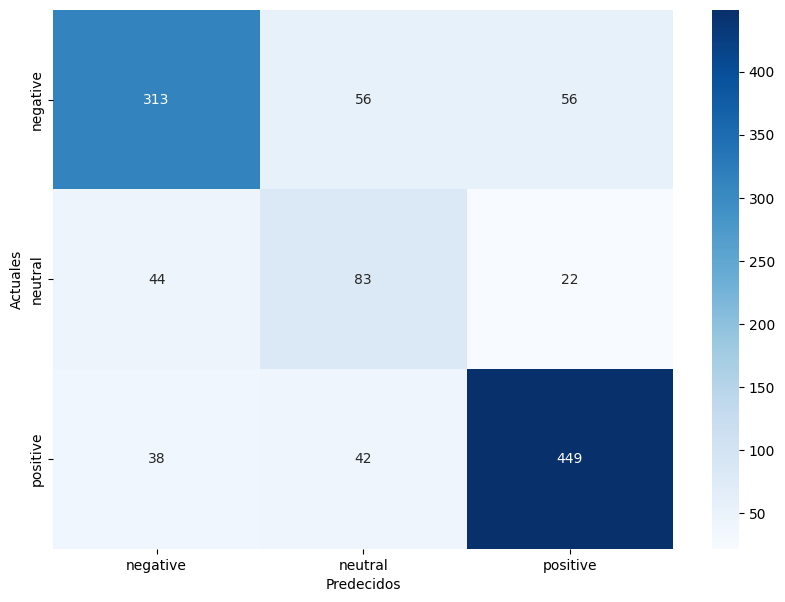

In [ ]:
cm = confusion_matrix(y_test, y_pred_log)
print(['confusion_matrix'])

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predecidos')
plt.ylabel('Actuales')

plt.show()

# ***Evaluacion del desempeño***

En el proceso de evaluación de modelos, se ejecutó un entrenamiento que utilizó el 80% de los datos, reservando el 20% restante para pruebas. Se evaluaron tres algoritmos diferentes: RandomForestClassifier, SVM y Logistic Regression Multiclass. Entre estos, se observó que el algoritmo RandomForestClassifier exhibió los mejores resultados de desempeño, con un accuracy del 77%. Además, este algoritmo demostró un F1-score destacado en las categorías de neutros, con un 52%, positivos, con un 84%, y negativos, con un 77%. Estos resultados sugieren que el RandomForestClassifier es una elección efectiva para este conjunto de datos y puede ofrecer un buen rendimiento en la tarea de clasificación."

# ***Prediccion***

Ahora podemos usar el modelo de Random Forest Classifier para realizar predicciones

1. Prediccion del sentimiento de un nuevo comentario

In [ ]:
new_opinion = {
    'product_name': 'New Product',
    'product_price': 1000,
    "Rate": "1",
    'Review': 'worst experience ever!',
    'Summary': "i like the product.Its perfect¡"
}

In [ ]:
# Reemplazar contracciones en la variable new_text
import contractions
Summary_processed= replace_contraction(new_opinion["Summary"])
# Summary_processed
tokenized = tokenize(Summary_processed)
# Quitar stopwords (quitar_stopwords)
tokenized_clean= quitar_stopwords(tokenized)
# Quitamos los símbolos de puntuación (quitar_puntuacion)
tokenized_clean = quitar_puntuacion(tokenized_clean)
# Lematizamos (lematizar)
lematizacion = lematizar(tokenized_clean)
# Caracteristicas adicionales al sentimiento
newsentiment=TextBlob(lematizacion).sentiment.polarity

#vectorizacion
vector_data_new = vectorizador.transform([lematizacion])

extra_features = [newsentiment]

# Añadir las columnas codificadas
X_new = sp.sparse.hstack((vector_data_new ,extra_features),format='csr')

In [ ]:
import pickle
# Predecir el sentimiento del nuevo dato con el modelo entrenado
new_pred = model.predict(X_new)

# Convertir la predicción numérica de nuevo en una etiqueta de sentimiento
new_sentiment = encoder.inverse_transform(new_pred)

print(f"The predicted sentiment is: {new_sentiment[0]}")


In [ ]:
#serializacion del modelo
with open ('model.pkl','wb') as archivo:
  pickle.dump(model, archivo)


In [ ]:
#serializacion del modelo
with open ('encoder.pkl','wb') as archivo:
  pickle.dump(encoder, archivo)

In [ ]:
#serializacion del modelo
with open ('vectorizador.pkl','wb') as archivo:
  pickle.dump(vectorizador, archivo)


In [ ]:
print(encoder.classes_)